In [1]:
import numpy as np
from numpy.linalg import svd
from skimage.transform import rotate

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
plt.rcParams['font.size'] = 18

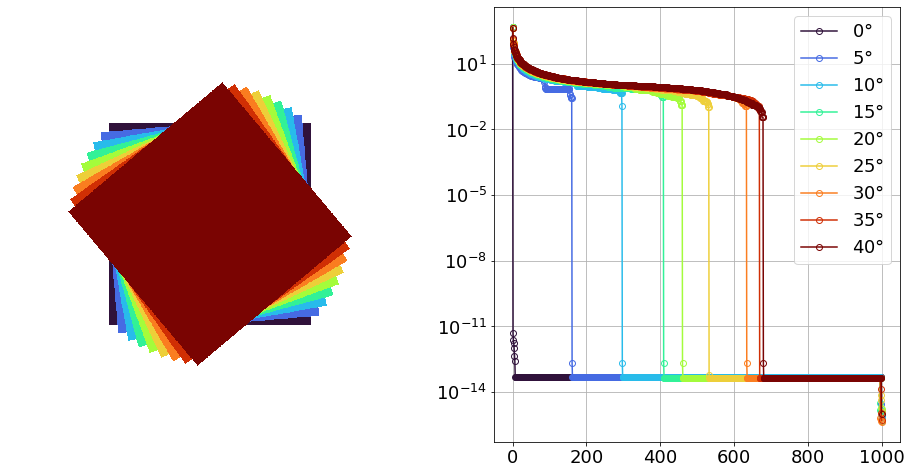

In [2]:
# Initial aligned square
n = 1000
q = n // 4
X = np.zeros((n, n))
X[q:3*q, q:3*q] = 1

# Sweep through range of angles of rotation
angles = np.arange(0, 41, 5)
nangles = len(angles)

cmap = get_cmap('turbo')

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
for i, angle in enumerate(angles):
    X_rot = rotate(X, angle) > 0
    U, S, VT = svd(X_rot)
    axs[0].imshow(np.ma.masked_where(X_rot==0, (i + 1) * X_rot), vmin=1, vmax=nangles, cmap=cmap)    
    axs[1].semilogy(S, '-o', mfc='none', label=f'${angle}\\degree$', color=cmap(i/(nangles-1)))

axs[0].axis(False)
axs[1].grid(True)
axs[1].legend();